<a href="https://colab.research.google.com/github/deshmukhpranoti/K-means_Clustering/blob/master/TSF_TASK_2_K_means_Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Task 2: Prediction using Unsupervised ML**

###**From the iris dataset, predict the optimum number of cluster and represent it visually**

####**By Pranoti Deshmukh**

###**Importing Libraries**

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#To read the csv file
df=pd.read_csv('Iris.csv')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# To drop Id column 
df0=df.drop('Id',axis=1)
df0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# to print all the unique values in species column
print(df0['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#Categorical data to numerical data
df0.loc[df["Species"]=="Iris-setosa","Species"]=0
df0.loc[df["Species"]=="Iris-versicolor","Species"]=1
df0.loc[df["Species"]=="Iris-virginica","Species"]=2
df0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#To perform standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df0)

In [ ]:
#Train the model
from sklearn.cluster import KMeans
ssq = []

for K in range(1,10):
    my_model = KMeans(n_clusters=K, init = 'k-means++',max_iter = 300, n_init = 10, random_state=123)
    result = my_model.fit(df_scaled)
    ssq.append(result.inertia_)



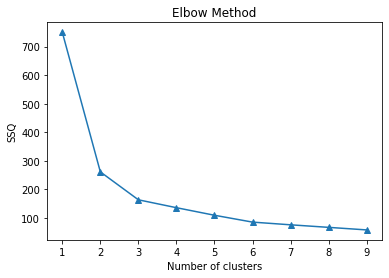

In [ ]:
# Using elbow method to find optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1,10), ssq, marker='^')
plt.xlabel("Number of clusters")
plt.ylabel("SSQ")
plt.title("Elbow Method")
plt.show()


In [ ]:
#Training the model by giving the cluster value
my_model = KMeans(n_clusters=3, init = 'k-means++',max_iter = 300, n_init = 10, random_state=23)
result = my_model.fit(df_scaled)

In [ ]:
#test the model
predictions = result.predict(df_scaled)
predictions[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df0['cluster']=predictions
df0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Text(0.5, 1.0, 'Clustering output')

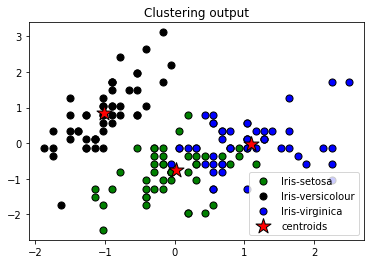

In [ ]:
#Scatter plot
plt.scatter(df_scaled[predictions==0,0], df_scaled[predictions==0, 1], s=50, c='green',\
           marker='o', edgecolors='black', label='Iris-setosa')
plt.scatter(df_scaled[predictions==1,0], df_scaled[predictions==1, 1], s=50, c='black',\
           marker='o', edgecolors='black', label='Iris-versicolour')
plt.scatter(df_scaled[predictions==2,0], df_scaled[predictions==2, 1], s=50, c='blue',\
           marker='o', edgecolors='black', label='Iris-virginica')
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend()
plt.title('Clustering output')

